# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Fery Irawan
- Email: fery21irawan.me@gmail.com
- Id Dicoding: mazafathi

## Menentukan Pertanyaan Bisnis

## Menyiapkan semua library yang dibuthkan

- Bagaimana performa penyewaan sepeda dari tahun 2011 sampai 2012 ?
- Pada musim apa kebanyakan orang-orang menyewa sepeda ?
- Kapan waktu yang paling banyak digunakan orang-orang untuk menyewa sepeda ?
- Lebih banyak mana jumlah penyewaan sepeda antara pengguna biasa dan pengguna terdaftar ? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

## Dataset Day

**Cek info terkait dataset day**

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Cek duplikasi data**

In [4]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**memeriksa parameter statistik**

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

**Mengubah Tipe data dteday pada dataset day**

In [6]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Mengubah nilai pada kolom yr dan season menjadi nilai yang mudah dibaca berdasarkan readme.txt pada dataset**

In [7]:
season_mapping = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
yr_mapping = {
    0: 2011,
    1: 2012
}
day_df['season'] = day_df['season'].map(season_mapping)
day_df['yr'] = day_df['yr'].map(yr_mapping)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Memastikan kembali dataset sudah sesuai**

In [8]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Mendapatkan nilai agregat dari total jumlah sewa**

In [10]:
day_df.agg({"instant":"nunique","cnt":["sum","max","min","mean"]})

,instant,cnt
nunique,731.0,NaN
sum,NaN,3.292679e+06
max,NaN,8.714000e+03
min,NaN,2.200000e+01
mean,NaN,4.504349e+03


**Mencari jumlah penyewaan berdasarkan tahun dan bulan**

In [11]:
compare_per_year = day_df.groupby(by=["yr","mnth"]).agg({"cnt":"sum"}).sort_values(by=["yr","mnth"],ascending=True).reset_index()
print(compare_per_year)

      yr  mnth     cnt
0   2011     1   38189
1   2011     2   48215
2   2011     3   64045
3   2011     4   94870
4   2011     5  135821
5   2011     6  143512
6   2011     7  141341
7   2011     8  136691
8   2011     9  127418
9   2011    10  123511
10  2011    11  102167
11  2011    12   87323
12  2012     1   96744
13  2012     2  103137
14  2012     3  164875
15  2012     4  174224
16  2012     5  195865
17  2012     6  202830
18  2012     7  203607
19  2012     8  214503
20  2012     9  218573
21  2012    10  198841
22  2012    11  152664
23  2012    12  123713


**Mengubah nilai tahun menjadi kolom**

In [12]:
yr_mnth_df = compare_per_year.pivot(index='mnth', columns='yr', values='cnt')
print(yr_mnth_df)

yr      2011    2012
mnth                
1      38189   96744
2      48215  103137
3      64045  164875
4      94870  174224
5     135821  195865
6     143512  202830
7     141341  203607
8     136691  214503
9     127418  218573
10    123511  198841
11    102167  152664
12     87323  123713


**Mengubah Nama Bulan**

In [13]:
import calendar
month_names = [calendar.month_abbr[i] for i in yr_mnth_df.index]
yr_mnth_df.index = month_names

yr_mnth_df.columns = [str(col) for col in yr_mnth_df.columns]
print(yr_mnth_df)

       2011    2012
Jan   38189   96744
Feb   48215  103137
Mar   64045  164875
Apr   94870  174224
May  135821  195865
Jun  143512  202830
Jul  141341  203607
Aug  136691  214503
Sep  127418  218573
Oct  123511  198841
Nov  102167  152664
Dec   87323  123713


**Mendapatkan jumlah penyewaan berdasarkan musim**

In [14]:
day_df.groupby(by="season").agg({"cnt":"sum"}).sort_values(by="cnt",ascending=True).reset_index()

,season,cnt
0,Springer,471348
1,Winter,841613
2,Summer,918589
3,Fall,1061129


**Mendapatkan Jumlah Penyewaan dari Pengguna terdaftar dan Pengguna Casual**

In [15]:
day_df.agg({"casual":"sum","registered":"sum"}).reset_index()

,index,0
0,casual,620017
1,registered,2672662


In [16]:
day_name_df = day_df.groupby(by=["weekday"]).agg({"cnt":"sum"}).sort_values(by=["cnt"],ascending=True).reset_index()
day_names = [calendar.day_name[i] for i in day_name_df["weekday"]]
day_name_df["weekday"] = day_names
print(day_name_df)

     weekday     cnt
0     Monday  444027
1    Tuesday  455503
2  Wednesday  469109
3   Thursday  473048
4     Sunday  477807
5     Friday  485395
6   Saturday  487790


## Visualization & Explanatory Analysis

In [17]:
chart_color = ["#90CAF9","#D3D3D3"]
color_primary, color_secondary = chart_color

### Pertanyaan 1: Bagaimana performa penyewaan sepeda antara tahun 2011 sampai 2012 ? 

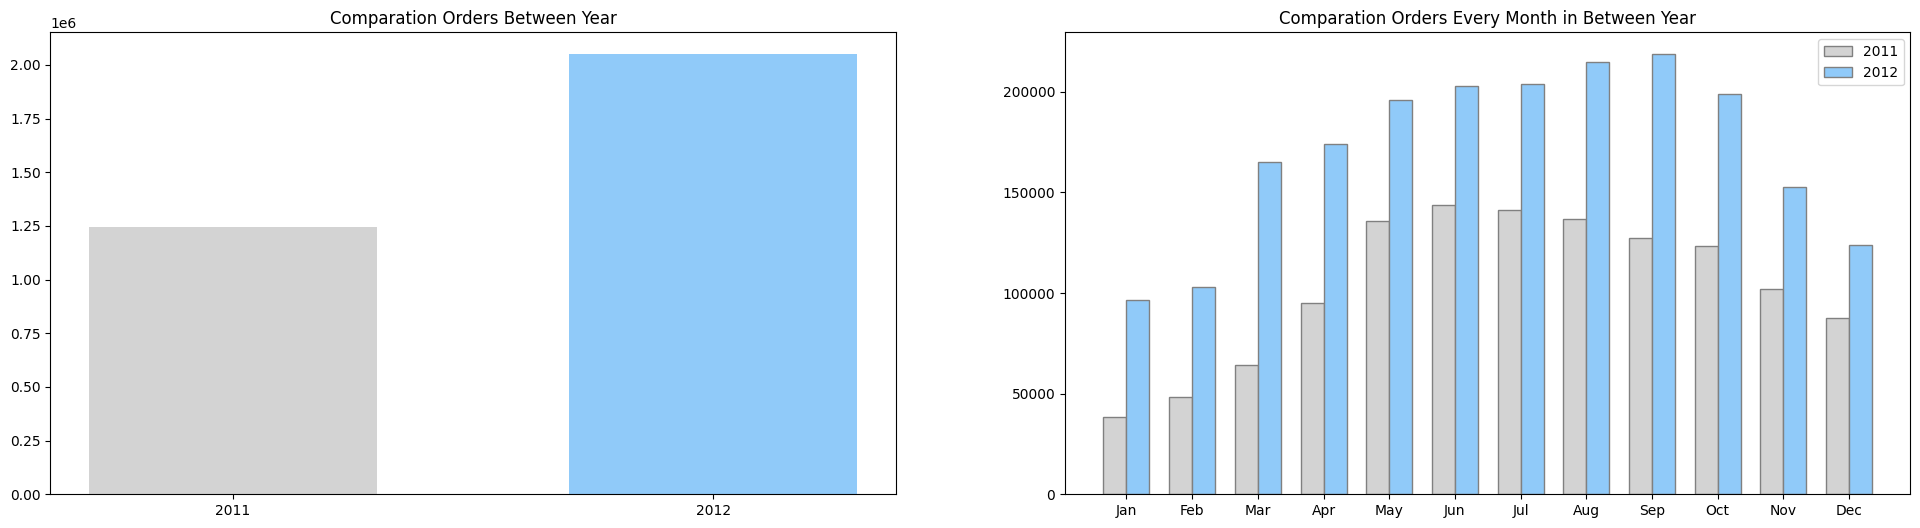

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
# Data untuk bar chart
compare_data = day_df.groupby(by="yr").agg({"cnt":"sum"}).reset_index()
compare_data["yr"] = compare_data["yr"].astype(str)
x = np.array(compare_data["yr"])
y = np.array(compare_data["cnt"])

# Memasukkan bar chart pada ax[0]
ax[0].bar(x, y, color=chart_color[::-1], width=0.6)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title('Comparation Orders Between Year')

index_list = yr_mnth_df.index.tolist()
year_2011_list = yr_mnth_df["2011"].tolist()
year_2012_list = yr_mnth_df["2012"].tolist()

# Menghitung lebar bar
bar_width = 0.35

# Membuat posisi x untuk bar chart
r1 = np.arange(len(index_list))
r2 = [x + bar_width for x in r1]

# Membuat grouped bar chart
ax[1].bar(r1, year_2011_list, color=color_secondary, width=bar_width, edgecolor='grey', label='2011')
ax[1].bar(r2, year_2012_list, color=color_primary, width=bar_width, edgecolor='grey', label='2012')

# Menentukan label pada sumbu x dan y
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

ax[1].set_title("Comparation Orders Every Month in Between Year")

# Menentukan label pada sumbu x
ax[1].set_xticks([r + bar_width/2 for r in range(len(index_list))], index_list)

# Menambahkan label pada bar chart
ax[1].legend()


# Menampilkan plot
plt.show()

### Pertanyaan 2: Pada musim apa kebanyakan orang-orang menyewa sepeda ?

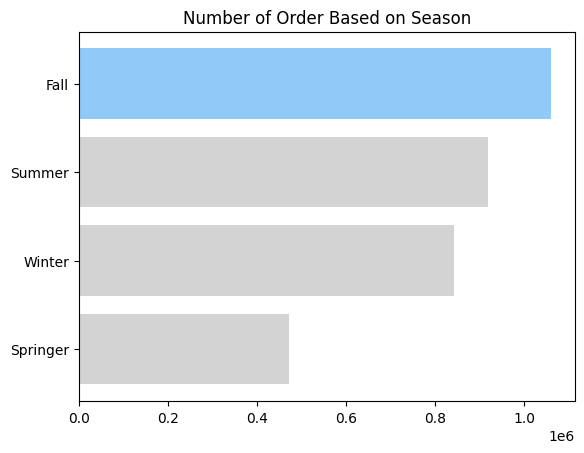

In [19]:
season = day_df.groupby(by="season").agg({"cnt":"sum"}).sort_values(by="cnt",ascending=True).reset_index()
max_value = max(season['cnt'])
colors = []
for c in range(len(season["cnt"])):
    colors.append(color_primary if season['cnt'][c] == max_value else color_secondary)
plt.title("Number of Order Based on Season")
plt.barh(season["season"],season["cnt"],color=colors)
plt.show()

### Pertanyaan 3: Pada hari apa yang paling banyak digunakan orang-orang untuk menyewa sepeda ?

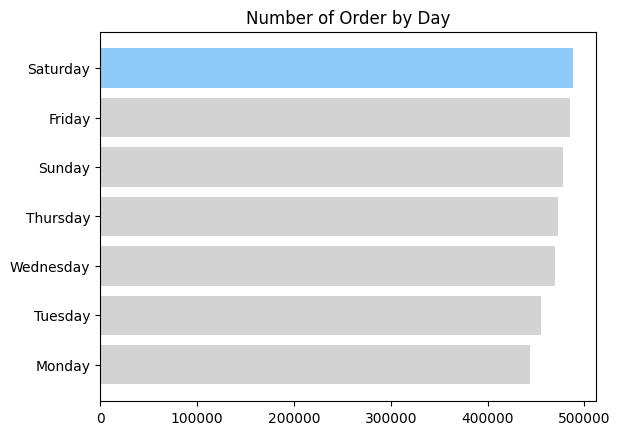

In [20]:
time_sharing = day_df.groupby(by=["weekday"]).agg({"cnt":"sum"}).sort_values(by=["cnt"],ascending=True).reset_index()
day_names = [calendar.day_name[i] for i in time_sharing["weekday"]]
time_sharing["weekday"] = day_names
max_value = max(time_sharing['cnt'])
colors = []
for c in range(len(time_sharing["cnt"])):
    colors.append(color_primary if time_sharing['cnt'][c] == max_value else color_secondary)

plt.barh(time_sharing["weekday"],time_sharing["cnt"],color=colors)
plt.title("Number of Order by Day")
plt.show()

### Pertanyaan 4: Lebih banyak mana jumlah penyewaan sepeda antara pengguna biasa dan pengguna terdaftar ? 

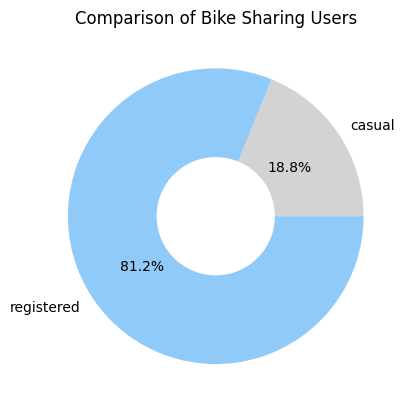

In [21]:
users = day_df.agg({"casual":"sum","registered":"sum"}).reset_index()
plt.pie(users[0],colors=chart_color[::-1],autopct='%1.1f%%',labels=users["index"],wedgeprops=dict(width=0.6))
plt.title("Comparison of Bike Sharing Users")
plt.show()

In [24]:
day_df.to_csv("dashboard/main_data.csv", index=False)

## Conclusion

- Terjadi peningkatan dalam penyewaan sepeda di tahun setelahnya, mengalami peningkatan mendekati akhir tahun dan mengalami penurunan di akhir dan awal tahun
- Kebanyakan orang-orang menyewa sepeda pada saat musim gugur
- Kebanyakan orang-orang menyewa sepeda pada hari Sabtu
- mayoritas orang-orang yang menyewa sepeda dari pengguna yang sudah terdaftar